In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
prices = pd.read_csv('stock_prices.csv', index_col=0)

In [5]:
prices.head()

,data_date,open,high,low,close,volume,ticker
0,12/4/20,172.13,173.16,171.54,172.46,2663697,MMM
1,12/3/20,171.04,173.39,171.04,171.83,2377756,MMM
2,12/2/20,170.26,172.58,170.22,171.85,2421915,MMM
3,12/1/20,174.22,175.69,170.01,170.52,3851211,MMM
4,11/30/20,175.77,176.00,172.70,172.73,6141333,MMM


In [7]:
prices=prices.sort_values(by=['ticker', 'data_date'])

In [17]:
prices['data_date'] = pd.to_datetime(prices['data_date'])

In [18]:
prices['data_date'].min()

Timestamp('2020-01-02 00:00:00')

# calculate return with close price

In [23]:
dense_returns = prices.groupby(['data_date','ticker'])['close'].last().unstack().pct_change()

# How stocks react when Covid just break out (From google trends, the topic reached 100% popularity on March 22, which is a Sunday. So we choose March 23, Monday for stock price check)

In [76]:
spy = pd.read_csv('SPY_price.csv')
spy['return'] = spy['close'].pct_change()

In [82]:
spy['data_date'] = pd.to_datetime(spy['data_date'])

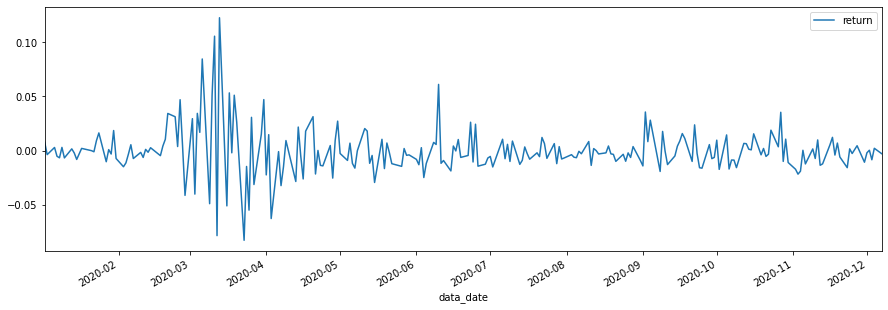

In [91]:
spy[['data_date', 'return']].dropna().set_index('data_date').plot(figsize=(15,5));

In [ ]:
# Load company meta data for sector information
comps = pd.read_csv('sp500.csv', index_col=0)
comps_sub1 = comps[['Symbol', 'Company_Name', 'GICS Sector']]

In [97]:
march_ret = dense_returns[dense_returns.index=='2020-03-23'].T
march_ret = march_ret.sort_values('2020-03-23')
march_ret = march_ret.reset_index()

march_ret = march_ret.merge(comps_sub1, how='left', left_on='ticker', right_on='Symbol')
march_ret = march_ret.drop('Symbol', 1)
march_ret.columns = ['ticker', 'return', 'company', 'sector']

In [101]:
march_sec_med = march_ret.groupby('sector').median().sort_values('return')

# On nov. 9th vaccine news released

In [68]:
nov9_ret = dense_returns[dense_returns.index=='2020-11-09'].T
nov9_ret = nov9_ret.sort_values('2020-11-09')
nov9_ret = nov9_ret.reset_index()

In [69]:
nov9_ret

data_date,ticker,2020-11-09 00:00:00
0,BIIB,-0.281666
1,ETSY,-0.171452
2,POOL,-0.158244
3,CLX,-0.106245
4,WHR,-0.103898
...,...,...
498,FRT,0.329029
499,REG,0.349780
500,SLG,0.369238
501,CCL,0.392909


In [70]:
nov9_ret = nov9_ret.merge(comps_sub1, how='left', left_on='ticker', right_on='Symbol')
nov9_ret = nov9_ret.drop('Symbol', 1)
nov9_ret.columns = ['ticker', 'return', 'company', 'sector']

In [102]:
nov_sector_med = nov9_ret.groupby('sector').median().sort_values('return')

In [109]:
sec_performance = pd.concat([march_sec_med, nov_sector_med], axis=1)
sec_performance.columns = ['march_med_ret', 'nov_med_ret']

/Users/annzhong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [112]:
sec_performance*100

,march_med_ret,nov_med_ret
Communication Services,-1.257550,1.484563
Consumer Discretionary,-1.346389,2.115237
Consumer Staples,-4.246978,-1.505480
Energy,-5.799935,16.570272
Financials,-5.863956,11.017787
Health Care,-4.824695,1.302543
Industrials,-4.500656,2.762254
Information Technology,-1.486391,1.306559
Materials,-5.072599,2.916930
Real Estate,-6.212925,11.249283


## There is a large rebound in sector performance when vaccine released. Especially for Energy, Financials, and Real Estate.